### Ogólne wprowadzenie

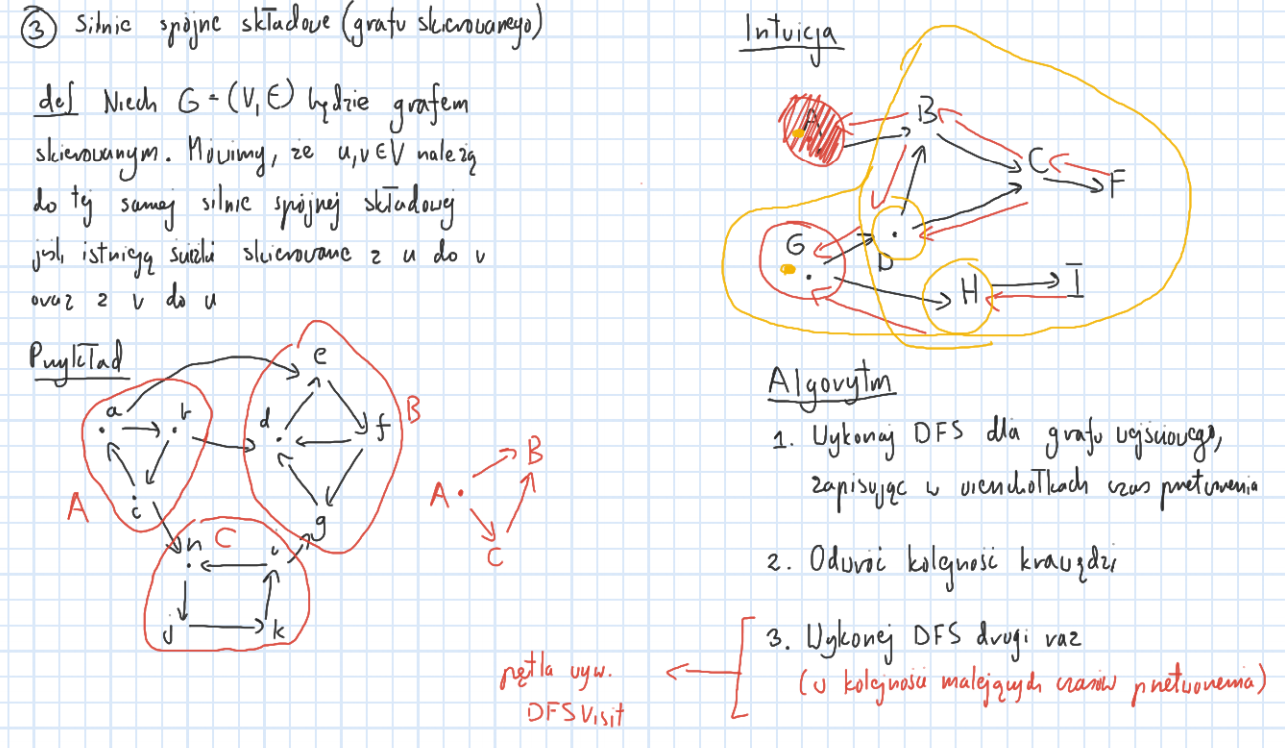
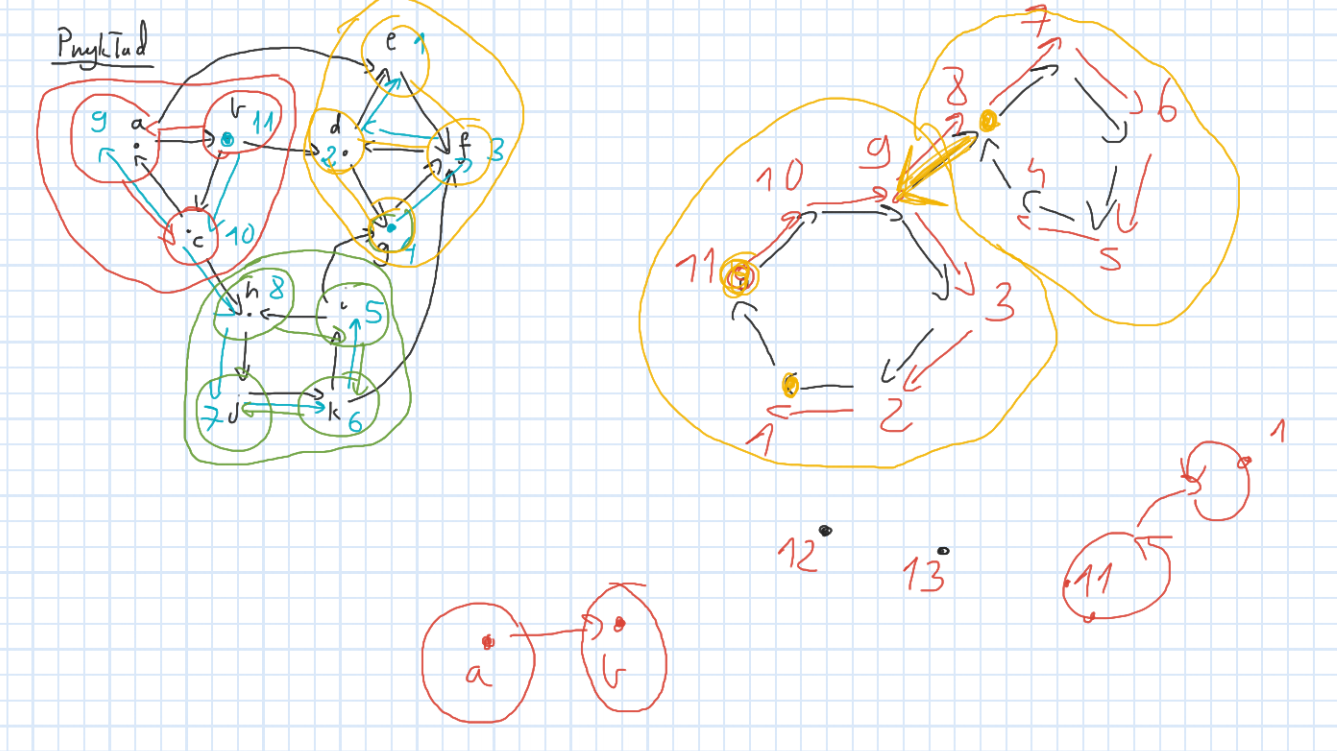

### Złożoność

##### Dla listowej reprezentacji grafu
###### Obliczeniowa
$ O(V + E) $
###### Pamięciowa
$ O(V) $  - zakładam, że otrzymany graf na wejściu, nie wlicza się do złożoności <br>
*$ O(V + E) $ - jeżeli tworzymy graf transponowany składowych, a nie transponujemy w miejscu

##### Dla macierzowej reprezentacji grafu
###### Obliczeniowa
$ O(V^2) $
###### Pamięciowa
$ O(V) $  - zakładam, że otrzymany graf na wejściu, nie wlicza się do złożoności

### Implementacja #1
#### Dla listowej reprezentacji grafu

In [1]:
def directed_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G


def get_process_times(G: 'graph represented using adjacency lists'):
    n = len(G)
    times = [0] * n
    visited = [False] * n
    time = 0
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal time
        time += 1
        times[u] = time
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return times


def get_transposed_graph(G: 'graph represented using adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    
    for u in range(n):
        for v in G[u]:
            G2[v].append(u)
            
    return G2


def get_vertices_order(times):
    n = len(times)
    order = [-1] * n
    for i in range(n):
        order[n - times[i]] = i
    return order


def find_coherent_components(G: 'graph represented using adjacency lists'):
    n = len(G)
    # Get processing time of each vertex
    times = get_process_times(G)
    # Create a transposed graph
    G = get_transposed_graph(G)
    # Get order of vertices in which DFS will be started from such vertices
    order = get_vertices_order(times)    
    # Create an array in which a result will be stored (each number will refer
    # to the other coherent component of a graph)
    result = [-1] * n  # This array will also be used to check if a vertex was visited
    token = 0
    
    def dfs(u):
        result[u] = token
        for v in G[u]:
            if result[v] < 0:
                dfs(v)
        
    # Start dfs from vertices of the highest processing time
    for i in range(n):
        u = order[i]
        if result[u] < 0:
            dfs(u)
            token += 1
            
    return result

###### Kilka testów

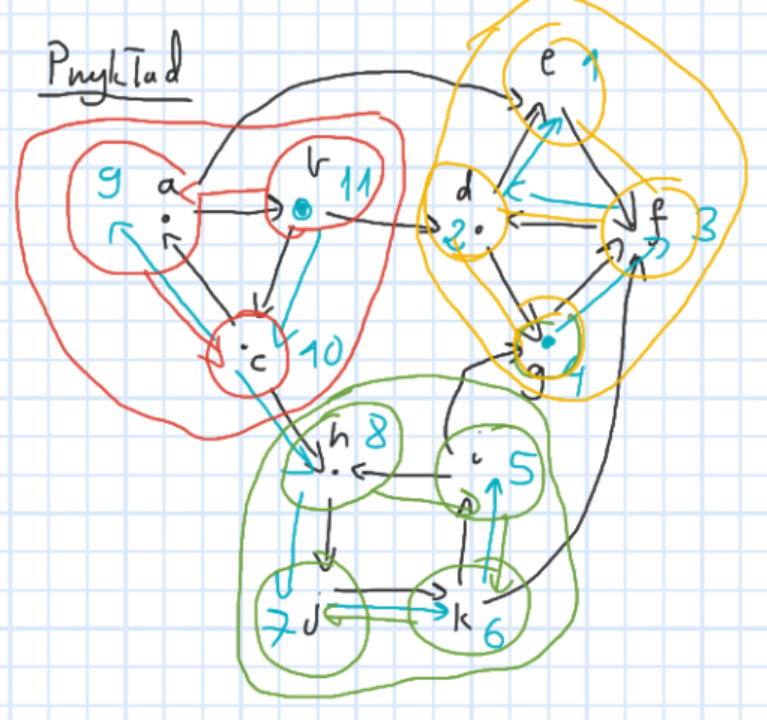

In [2]:
from string import ascii_lowercase

E = list(map(lambda p: tuple(map(lambda u: ord(u) - ord('a'), p)), 
    ['ab', 'ae', 'bc', 'bd', 'ca', 'ch', 'de', 'dg', 'ef', 
     'fd', 'gf', 'hj', 'jk', 'ki', 'ih', 'ig', 'kf']
))

G = directed_graph_list(E, 11)
print(*G, sep='\n')

print(*zip(ascii_lowercase, get_process_times(G)))
print(get_transposed_graph(G))

[1, 4]
[2, 3]
[0, 7]
[4, 6]
[5]
[3]
[5]
[9]
[7, 6]
[10]
[8, 5]
('a', 11) ('b', 10) ('c', 9) ('d', 2) ('e', 1) ('f', 3) ('g', 4) ('h', 8) ('i', 5) ('j', 7) ('k', 6)
[[2], [0], [1], [1, 5], [0, 3], [4, 6, 10], [3, 8], [2, 8], [10], [7], [9]]


In [3]:
print(find_coherent_components(G), '  '.join(list(ascii_lowercase[:11])), sep='\n  ')

[0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1]
  a  b  c  d  e  f  g  h  i  j  k


### Implementacja #2
#### Dla macierzowej reprezentacji grafu

In [4]:
def directed_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = 1
    return M


def get_process_times(G: 'graph represented using adjacency lists'):
    n = len(G)
    times = [0] * n
    visited = [False] * n
    time = 0
    
    def dfs(u):
        visited[u] = True
        for v in range(n):
            if G[u][v] and not visited[v]:
                dfs(v)
        nonlocal time
        time += 1
        times[u] = time
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return times


def transpose_graph(G: 'graph represented using adjacency lists'):
    n = len(G)
    
    for i in range(n - 1):
        for j in range(i + 1, n):
             G[i][j], G[j][i] = G[j][i], G[i][j]

                
def get_vertices_order(times):
    n = len(times)
    order = [-1] * n
    for i in range(n):
        order[n - times[i]] = i
    return order
                

def find_coherent_components(G: 'graph represented using adjacency lists'):
    n = len(G)
    # Get processing time of each vertex
    times = get_process_times(G)
    # Reversed graph's edges
    transpose_graph(G)
    # Get order of vertices in which DFS will be started from such vertices
    order = get_vertices_order(times)
    # Create an array in which a result will be stored (each number will refer
    # to the other coherent component of a graph)
    result = [-1] * n  # This array will also be used to check if a vertex was visited
    token = 0
    
    def dfs(u):
        result[u] = token
        for v in range(n):
            if G[u][v] and result[v] < 0:
                dfs(v)
        
    # Start dfs from vertices of the highest processing time
    for i in range(n):
        u = order[i]
        if result[u] < 0:
            dfs(u)
            token += 1
            
    # Restore the original graph
    transpose_graph(G)
            
    return result, token

###### Kilka testów

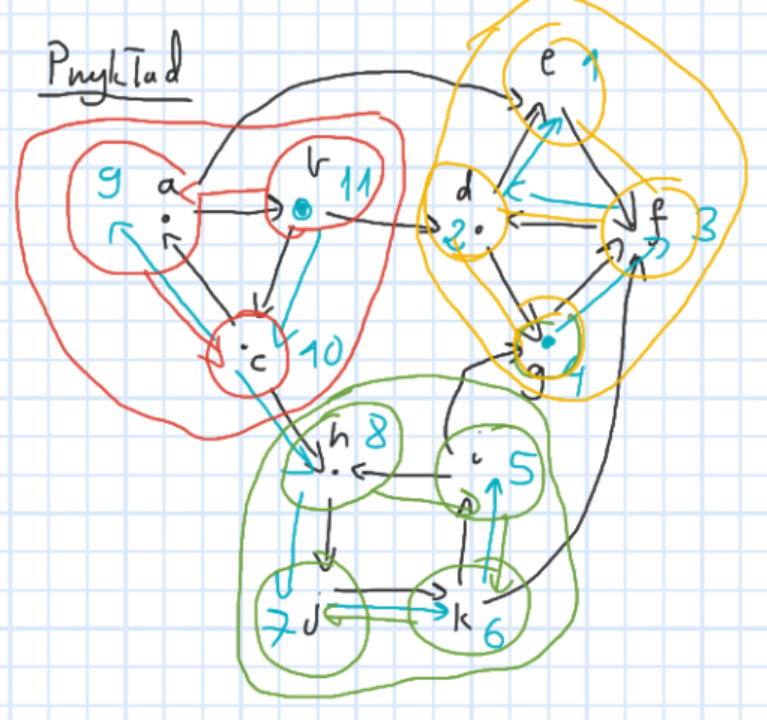

In [5]:
from string import ascii_lowercase

E = list(map(lambda p: tuple(map(lambda u: ord(u) - ord('a'), p)), 
    ['ab', 'ae', 'bc', 'bd', 'ca', 'ch', 'de', 'dg', 'ef', 
     'fd', 'gf', 'hj', 'jk', 'ki', 'ih', 'ig', 'kf']
))

G = directed_graph_matrix(E, 11)

In [6]:
print(find_coherent_components(G), '  '.join(list(ascii_lowercase[:11])), sep='\n  ')

([0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1], 3)
  a  b  c  d  e  f  g  h  i  j  k


### Implementacja #3
#### Dla listowej reprezentacji grafu
##### (Z transpozycją grafu w miejscu)

In [7]:
from collections import deque


def directed_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [deque() for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G


def get_process_times(G: 'graph represented using adjacency lists'):
    n = len(G)
    times = [0] * n
    visited = [False] * n
    time = 0
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal time
        time += 1
        times[u] = time
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return times


def transpose_graph(G: 'directed graph represented using adjacency lists'):
    n = len(G)
    # Store indices of the beginnings of new neighbours added to each vertex
    new_indices = [len(G[u]) for u in range(n)]
    
    # For each vertex remove its all old neighbours (vertices stored before the
    # first new added vertex) and for each of these removed neighbours append 
    # the current vertex to their new neighbours (this will be a reversed edge)
    for u in range(n):
        for _ in range(new_indices[u]):
            v = G[u].popleft()
            G[v].append(u)
        new_indices[u] = 0

        
def get_vertices_order(times):
    n = len(times)
    order = [-1] * n
    for i in range(n):
        order[n - times[i]] = i
    return order
        

def find_coherent_components(G: 'graph represented using adjacency lists'):
    n = len(G)
    # Get processing time of each vertex
    times = get_process_times(G)
    # Transpose a graph
    transpose_graph(G)
    # Get order of vertices in which DFS will be started from such vertices
    order = get_vertices_order(times)
    # Create an array in which a result will be stored (each number will refer
    # to the other coherent component of a graph)
    result = [-1] * n  # This array will also be used to check if a vertex was visited
    token = 0
    
    def dfs(u):
        result[u] = token
        for v in G[u]:
            if result[v] < 0:
                dfs(v)
        
    # Start dfs from vertices of the highest processing time
    for i in range(n):
        u = order[i]
        if result[u] < 0:
            dfs(u)
            token += 1
            
    # Transpose a graph again (in order to get the same graph
    # as the input)
    transpose_graph(G)
            
    return result, token

###### Kilka testów

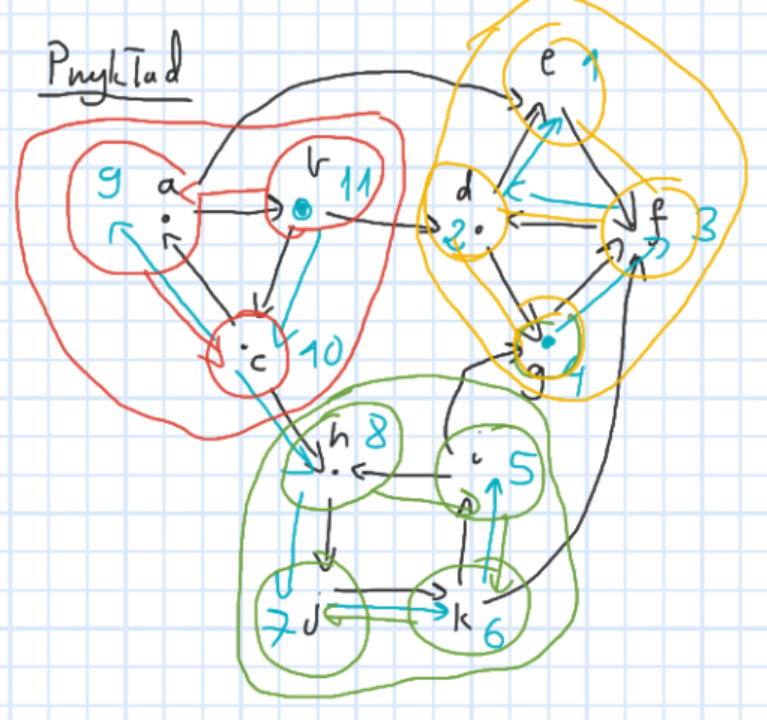

In [8]:
from string import ascii_lowercase

E = list(map(lambda p: tuple(map(lambda u: ord(u) - ord('a'), p)), 
    ['ab', 'ae', 'bc', 'bd', 'ca', 'ch', 'de', 'dg', 'ef', 
     'fd', 'gf', 'hj', 'jk', 'ki', 'ih', 'ig', 'kf']
))

G = directed_graph_list(E, 11)

In [9]:
print(find_coherent_components(G), '  '.join(list(ascii_lowercase[:11])), sep='\n  ')

([0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1], 3)
  a  b  c  d  e  f  g  h  i  j  k


### (Dodatkowo) Budowanie grafu silnie spójnych składowych #1
##### (W tej implementacji budujemy graf silnie spójnych składowych jako nowy graf, a także graf transponowany jako nowy graf)

Jeżeli z jednej silnie spójnej składowej wychodziło kilka różnych krawędzi do innej silnie spójnej składowej, dodajemy wszystkie krawędzie między silnie spójnymi składowymi, a nie tylko jedną.

In [10]:
def directed_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G


def get_process_times(G: 'directed graph represented using adjacency lists'):
    n = len(G)
    times = [0] * n
    visited = [False] * n
    time = 0
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal time
        time += 1
        times[u] = time
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return times


def get_transposed_graph(G: 'directed graph represented using adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    
    for u in range(n):
        for v in G[u]:
            G2[v].append(u)
            
    return G2


def get_vertices_order(times):
    n = len(times)
    order = [-1] * n
    for i in range(n):
        order[n - times[i]] = i
    return order


def find_coherent_components(G: 'directed graph represented using adjacency lists'):
    n = len(G)
    # Get processing time of each vertex
    times = get_process_times(G)
    # Create transposed graph
    G = get_transposed_graph(G)
    # Get order of vertices in which DFS will be started from such vertices
    order = get_vertices_order(times)
    # Create an array in which a result will be stored (each number will refer
    # to the other coherent component of a graph)
    result = [-1] * n  # This array will also be used to check if a vertex was visited
    token = 0
    
    def dfs(u):
        result[u] = token
        for v in G[u]:
            if result[v] < 0:
                dfs(v)
        
    # Start dfs from vertices of the highest processing time
    for i in range(n):
        u = order[i]
        if result[u] < 0:
            dfs(u)
            token += 1
            
    return result, token


def coherent_components_graph(G: 'directed graph represented using adjacency lists'):
    components, n2 = find_coherent_components(G)
    n = len(G)
    G2 = [[] for _ in range(n2)]
    # Store also representatives of each coherent component
    # (an index from the graph G of one of the vertices which
    # belong to the coherent component)
    represent = [-1] * n2
    
    for u in range(n):
        for v in G[u]:
            u2 = components[u]
            v2 = components[v]
            if represent[u2] < 0:
                represent[u2] = u
            if v2 != u2:
                G2[u2].append(v2)
                
    return G2, represent

###### Kilka testów

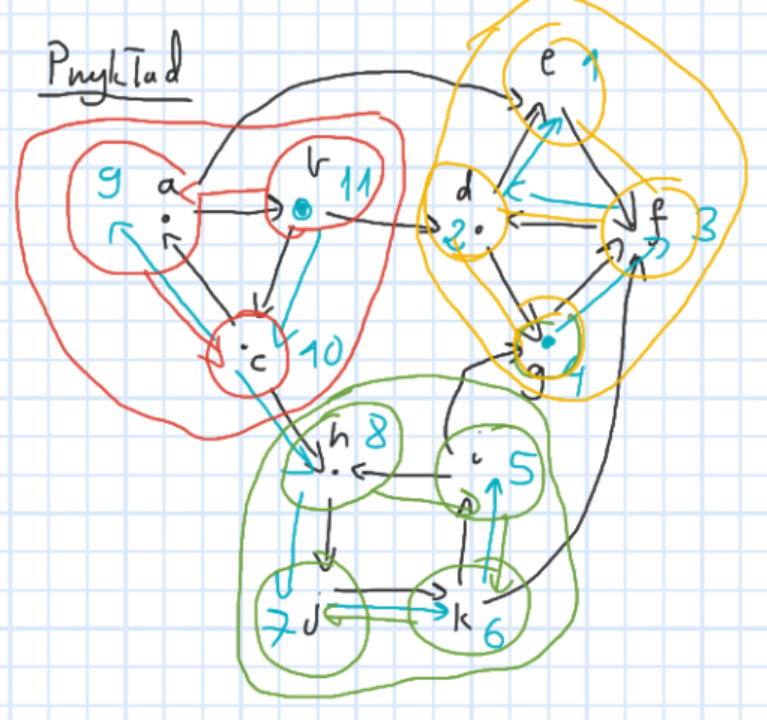

In [11]:
from string import ascii_lowercase

E = list(map(lambda p: tuple(map(lambda u: ord(u) - ord('a'), p)), 
    ['ab', 'ae', 'bc', 'bd', 'ca', 'ch', 'de', 'dg', 'ef', 
     'fd', 'gf', 'hj', 'jk', 'ki', 'ih', 'ig', 'kf']
))

G = directed_graph_list(E, 11)

In [12]:
print(find_coherent_components(G), '  '.join(list(ascii_lowercase[:11])), sep='\n  ')
print(coherent_components_graph(G))

([0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1], 3)
  a  b  c  d  e  f  g  h  i  j  k
([[2, 2, 1], [2, 2], []], [0, 7, 3])


### (Dodatkowo) Budowanie grafu silnie spójnych składowych #2
##### (W tej implementacji modyfikujemy graf, jaki otrzymujemy na wejściu, a więc transponujemy go w miejscu, a następnie zamieniamy na graf slinie spójnych składowych w miejscu)

In [13]:
from collections import deque


def directed_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [deque() for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G


def transpose_graph(G: 'directed graph represented using adjacency lists'):
    n = len(G)
    # Store indices of the beginnings of new neighbours added to each vertex
    new_indices = [len(G[u]) for u in range(n)]
    
    # For each vertex remove its all old neighbours (vertices stored before the
    # first new added vertex) and for each of these removed neighbours append 
    # the current vertex to their new neighbours (this will be a reversed edge)
    for u in range(n):
        for _ in range(new_indices[u]):
            v = G[u].popleft()
            G[v].append(u)
        new_indices[u] = 0


def get_process_times(G: 'directed graph represented using adjacency lists'):
    n = len(G)
    times = [0] * n
    visited = [False] * n
    time = 0
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal time
        time += 1
        times[u] = time
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return times


def get_vertices_order(times):
    n = len(times)
    order = [-1] * n
    for i in range(n):
        order[n - times[i]] = i
    return order


def find_coherent_components(G: 'directed graph represented using adjacency lists'):
    n = len(G)
    # Get processing time of each vertex
    times = get_process_times(G)
    # Transpose a graph (reverse all the edges)
    transpose_graph(G)
    # Get order of vertices in which DFS will be started from such vertices
    order = get_vertices_order(times)
    # Create an array in which a result will be stored (each number will refer
    # to the other coherent component of a graph)
    result = [-1] * n  # This array will also be used to check if a vertex was visited
    num = 0
    
    def dfs(u):
        result[u] = num
        for v in G[u]:
            if result[v] < 0:
                dfs(v)
        
    # Start dfs from vertices of the highest processing time
    for i in range(n):
        u = order[i]
        if result[u] < 0:
            dfs(u)
            num += 1
            
    # Restore the original graph (transpose again)
    transpose_graph(G)
            
    return result, num


def map_to_coherent_components_graph(G: 'directed graph represented using adjacency lists',
                                     comp: 'array of components indices which vertices belong to',
                                     m: 'number of unique coherent components'):
    # This array will hold indices of components representatives which will
    # become new indices of a graph (all the vertices from the same coherent
    # component will be merged with this one)
    represent = [None] * m 
    n = len(G)
    
    for u in range(n):
        # If there is no representative of the current coherent component, store the current
        # vertex as its representative
        if represent[comp[u]] is None:
            represent[comp[u]] = u
        # Remove all the edges of the current vertex which connect it with all other
        # vertices in the coherent component
        for _ in range(len(G[u])):
            v = G[u].popleft()
            if comp[v] != comp[u]:
                G[represent[comp[u]]].append(comp[v])
    
    # Remove empty vertices and fix mapped vertices to these of coherent components
    mapped = [None] * m
    for i in range(m):
        mapped[i] = G[represent[i]]
    for i in range(m):
        G[i] = mapped[i]
        
    # Pop all the empty entries remaining
    for _ in range(n - m):
        G.pop()
        
    return represent

###### Kilka testów

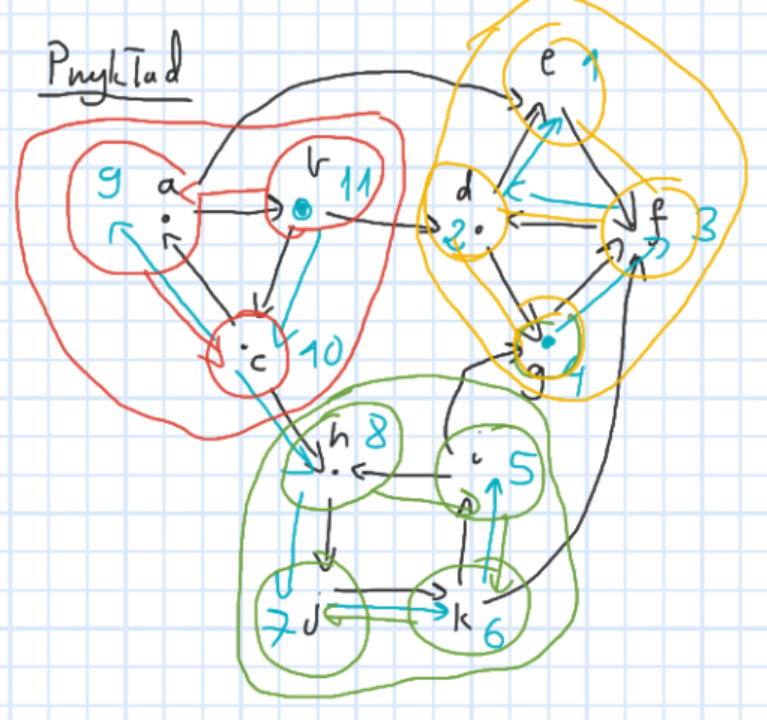

In [14]:
from string import ascii_lowercase

E = list(map(lambda p: tuple(map(lambda u: ord(u) - ord('a'), p)), 
    ['ab', 'ae', 'bc', 'bd', 'ca', 'ch', 'de', 'dg', 'ef', 
     'fd', 'gf', 'hj', 'jk', 'ki', 'ih', 'ig', 'kf']
))


In [15]:
G = directed_graph_list(E, 11)
comp, count = find_coherent_components(G)
print((comp, count), '  '.join(list(ascii_lowercase[:11])), sep='\n  ')
print('Representatives:', map_to_coherent_components_graph(G, comp, count))
print('Mapped graph:')
print(*G, sep='\n')

([0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1], 3)
  a  b  c  d  e  f  g  h  i  j  k
Representatives: [0, 7, 3]
Mapped graph:
deque([2, 2, 1])
deque([2, 2])
deque([])
